In [1]:
import os
import glob

from datetime import datetime
import pandas as pd
import ural
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

pd.options.display.max_columns = None
#pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [2]:
def import_data(folder, file_name):
    data_path = os.path.join(".", "data", folder, file_name)
    df = pd.read_csv(data_path, low_memory=False)
    return df

# Condor

In [3]:
df_condor = import_data('condor', 'tpfc-heloise.csv')
len(df_condor)

13894

Clean for missing and duplicate URL

In [4]:
df_condor = df_condor.dropna(subset=['clean_url'])
df_condor['clean_url'] = df_condor['clean_url'].apply(lambda x: ural.normalize_url(x))
df_condor['domain'] = df_condor['clean_url'].apply(lambda x: ural.get_domain_name(x))
df_condor = df_condor.drop_duplicates(subset=['clean_url'])
len(df_condor)

13489

Keep only the fact-checks stricly false and done in 2019 and 2020

In [5]:
df_condor = df_condor[df_condor['tpfc_rating']=='fact checked as false']
len(df_condor)

11335

In [6]:
df_condor['date'] = pd.to_datetime(df_condor['tpfc_first_fact_check'])
df_condor = df_condor[df_condor['date'] > datetime.strptime('2018-12-01', '%Y-%m-%d')]
df_condor = df_condor[df_condor['date'] < datetime.strptime('2021-01-01', '%Y-%m-%d')]
print(len(df_condor))

5653


In [7]:
print(np.min(df_condor['date']), '->', np.max(df_condor['date']))

2018-12-01 00:10:00 -> 2020-07-27 19:30:00


In [8]:
condor = set(df_condor['domain'].value_counts()[df_condor['domain'].value_counts() >= 2].index)
len(condor)

731

# Science Feedback

In [9]:
path = os.path.join('.', 'data', 'sciencefeedback_csv', '*.csv')
filenames = glob.glob(path)

all_dfs = []
for filename in filenames:
    df = pd.read_csv(filename, dtype=str)
    all_dfs.append(df)

df_sf = pd.concat(all_dfs, ignore_index=True)
len(df_sf)

20660

Clean for missing and duplicate URL

In [10]:
df_sf = df_sf.dropna(subset=['Content URL'])
df_sf['Content URL'] = df_sf['Content URL'].apply(lambda x: ural.normalize_url(x))
df_sf['domain'] = df_sf['Content URL'].apply(lambda x: ural.get_domain_name(x))
df_sf = df_sf.drop_duplicates(subset=['Content URL'])
len(df_sf)

17867

Keep only the fact-checks stricly false and done in 2019 and 2020

In [11]:
df_sf = df_sf[df_sf['Rating']=='FALSE']
len(df_sf)

11939

In [12]:
df_sf['date'] = pd.to_datetime(df_sf['Rating Date'])
df_sf = df_sf[df_sf['date'] > datetime.strptime('2018-12-01', '%Y-%m-%d')]
df_sf = df_sf[df_sf['date'] < datetime.strptime('2021-01-01', '%Y-%m-%d')]
print(len(df_sf))

9100


In [13]:
print(np.min(df_sf['date']), '->', np.max(df_sf['date']))

2019-04-18 00:00:00 -> 2020-12-31 00:00:00


In [14]:
sf = set(df_sf['domain'].value_counts()[df_sf['domain'].value_counts() >= 2].index)

In [15]:
len(sf)

365

# Iffy +

The Iffy data is got from here: https://iffy.news/iffy-plus/.

In [16]:
df_iffy = import_data('iffy', 'iffy+ 2021-03 - Iffy+.csv')
iffy = set(df_iffy['Domain'].unique())
len(iffy)

812

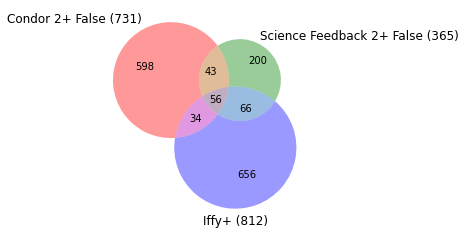

In [17]:
plt.figure(figsize=())

v = venn3(subsets=[condor, sf, iffy], 
          set_labels=('Condor 2+ False ({})'.format(len(condor)), 
                      'Science Feedback 2+ False ({})'.format(len(sf)), 
                      'Iffy+ ({})'.format(len(iffy))))

plt.savefig('./venn_2+.png')
plt.show()